<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Data_Analysis/DataProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## representing a csv as a list of rows


# option 1 : Each row is a list
csv = [['A1','A2','A3'],
       ['B1','B2','B3']]

# option 2 : Each row is a dictionary, where keys are the column names and values are the fields under column
csv = [{'name1':'A1','name2':'A2','name3':'A3'},
       {'name1':'B1','name2':'B2','name3':'B3'}]


In [4]:
!pip install unicodecsv     

  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10768 sha256=9883de4c26cddadebb4d1dc7172fe6c943e7574531f73a110e100cf6ea7ceccf
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
Successfully built unicodecsv


In [5]:
# filepaths 
enrollments_filename = '/content/drive/My Drive/Artificial Intelligence/DataAnalysis/enrollments.csv'
daily_engagement_filename = '/content/drive/My Drive/Artificial Intelligence/DataAnalysis/daily_engagement.csv'
project_submissions_filename = '/content/drive/My Drive/Artificial Intelligence/DataAnalysis/project_submissions.csv'

In [6]:
## Reeading csv files
import unicodecsv

with open(enrollments_filename,'rb') as f:
  reader = unicodecsv.DictReader(f)
  enrollments = list(reader)  # reader is an iterable, so convert it to list

enrollments[0]


OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [7]:
daily_engagement = []
project_submissions = []

with open(daily_engagement_filename,'rb') as f:
  reader = unicodecsv.DictReader(f)
  daily_engagement = list(reader)

with open(project_submissions_filename,'rb') as f:
  reader = unicodecsv.DictReader(f)
  project_submissions = list(reader)

print (daily_engagement[0])
print (project_submissions[0])

OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [8]:
# Refactoring the above code
def read_csv(filename):
  with open(filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    return list(reader)

In [9]:
enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(daily_engagement_filename)
project_submissions = read_csv(project_submissions_filename)

In [10]:
print (enrollments[0])
print (daily_engagement[0])
print (project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [11]:
# fixing the data types
# by default every field is of string type
# we might need, some integer types, or boolean types. Hence, fixing the data types

from datetime import datetime as dt

# takes a date a a string, and returns a Python datetime object
def parse_date(date):
  if date == '':
    return None
  else:
    return dt.strptime(date, '%Y-%m-%d')

# takes a string which is either empty string or maybe represents an integer
def parse_int(i):
  if i == '':
    return None
  else:
    return int(i)


In [12]:
for enrollment in enrollments:
  enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
  enrollment['days_to_cancel'] = parse_int(enrollment['days_to_cancel'])
  enrollment['join_date'] = parse_date(enrollment['join_date'])
  enrollment['is_udacity'] = enrollment['is_udacity'] == "True"
  enrollment['is_canceled'] = enrollment['is_canceled'] == "True"

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [13]:
for engagement_record in daily_engagement:
  engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
  engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
  engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
  engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
  engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

daily_engagement[0]


OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [14]:
for submission in project_submissions:
  submission['completion_date'] = parse_date(submission['completion_date'])
  submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [15]:
# cleaning the data a bit more
# problem 1 : tables enrollments and project_submissions has account_key, whereas daily_engagement has acct
# Fixing this problem : 

for engagement_record in daily_engagement:
  engagement_record['account_key'] = engagement_record['acct']
  del[engagement_record['acct']]

In [16]:
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [17]:
def get_unique_students(data):
  unique_students = set()
  for data_point in data:
    unique_students.add(data_point['account_key'])
  return unique_students

In [18]:
len(enrollments)

1640

In [19]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [20]:
len(daily_engagement)

136240

In [21]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [22]:
len(project_submissions)

3642

In [23]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [24]:
daily_engagement[0]['account_key']

'0'

In [25]:
# Investigating Data Problems, if any
# Steps : 
# 1. Identify surprising data points
# 2. Print out one or few surprising points
# 3. Fix any problems you find
# Repeat the process

In [26]:
enrolls_not_engaged = []
for unique_enrolls in unique_enrolled_students:
  if unique_enrolls not in unique_engagement_students:
    enrolls_not_engaged.append(unique_enrolls)

print ("Enrolls which are not engaged: ", len(enrolls_not_engaged))

Enrolls which are not engaged:  65


In [27]:
for enrollment in enrollments:
  if enrollment['account_key'] in enrolls_not_engaged:
    print (enrollment)

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '871'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 13, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 13, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '1218'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 15, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 15, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '654'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 12, 4, 0, 0)), ('cancel_date', datetime.datetime(2014, 12, 4, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '654'),

In [28]:
# We make a conclusion that the ones who are not engaging but enrolled have -
# cancelled after enrolling. 
# The enrollments were cancelled right on the day of enrollment, except two students who cancelled after 59 and 99 days
# resp. 

In [29]:
# finding those who enrolled but not engaged and their days to cancel is greater than 0
for enrollment in enrollments:
  if enrollment['account_key'] in enrolls_not_engaged:
    dc = enrollment['days_to_cancel']
    if dc == None or dc != 0:
      print (enrollment)
    


OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


In [30]:
# Turns out these 3 belong to udacity test accounts
# So remove the people who are just having test accounts. i.e if is_udacity is true then having test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
  if enrollment['is_udacity']:
    udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [31]:
# 6 people with test accounts
# remove these guys, as we wouldn't be needing them in our analysis
def remove_udacity_accounts(data):
  non_udacity_data = []
  for data_point in data:
    if data_point['account_key'] not in udacity_test_accounts:
      non_udacity_data.append(data_point)
  return non_udacity_data

In [32]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


In [33]:
non_udacity_enrollments[0]

OrderedDict([('account_key', '700'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2014, 11, 16, 0, 0)),
             ('days_to_cancel', 6),
             ('is_udacity', False),
             ('is_canceled', True)])

In [34]:
# Data Exploration Phase

In [35]:
# Create a dictionary of students who either:
# . haven't canceled yet  (days_to_cancel is None)
# . stayed enrolled more than 7 days (days_to_cancel > 7) (i.e these are paid students, as there is a 7 day free trial)
# keys: account_key, values: enrollment date
# name the dictionary paid_students

In [36]:
paid_students = {}
for enrollment in non_udacity_enrollments:
  if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
    account_key = enrollment['account_key']
    enrollment_date = enrollment['join_date']

    # storing most recent enrollment date
    if account_key not in paid_students or enrollment_date > paid_students[account_key]:
      paid_students[account_key] = enrollment_date

print (len(paid_students))

995


In [37]:
non_udacity_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [38]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [39]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

In [40]:
def remove_free_trial_cancels(data):
  new_data = []
  for data_point in data:
    if data_point['account_key'] in paid_students:
      new_data.append(data_point)
  return new_data

In [41]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

1293
134549
3618


In [42]:
for engagement_record in paid_engagement:
  if engagement_record['num_courses_visited'] > 0:
    engagement_record['has_visited'] = 1
  else:
    engagement_record['has_visited'] = 0

In [43]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
  account_key = engagement_record['account_key']
  join_date = paid_students[account_key]
  engagement_record_date = engagement_record['utc_date']

  if within_one_week(join_date, engagement_record_date):
    paid_engagement_in_first_week.append(engagement_record)

print (len(paid_engagement_in_first_week)) 

6919


In [44]:
for i in range(len(paid_engagement_in_first_week)):
  print (paid_engagement_in_first_week[i])
  if i > 5 :
    break

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.2848873333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 33.4892696667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 13, 0, 0)), ('num_courses_v

In [45]:
from collections import defaultdict

In [46]:
def group_data(data,key_name):
  grouped_data = defaultdict(list)
  for data_point in data:
    key = data_point[key_name]
    grouped_data[key].append(data_point)
  return grouped_data

In [62]:
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

def sum_grouped_data(grouped_data,field_name):
  summed_data = {}
  for account_key,engagement_for_student in grouped_data.items():
    sum = 0
    for engagement_record in engagement_for_student:
      sum += engagement_record[field_name]
    summed_data[account_key] = sum
  return summed_data

In [63]:
total_minutes_by_account = sum_grouped_data(engagement_by_account,'total_minutes_visited')

total_minutes = list(total_minutes_by_account.values()) # convert to list, as dict.values() does not return list
print (total_minutes)


[494.88049616599994, 18.576384666670002, 0.0, 0.0, 33.3214046667, 329.7578566663, 780.4545511666701, 104.20388850009999, 989.113641833, 448.471384167, 130.12347833367, 0.0, 179.4719088333, 1013.3833969996999, 65.6221875, 983.375040335, 119.12030049999998, 235.49969150033, 155.1361575, 0.0, 447.93897783336996, 931.1036911666699, 657.2052335000001, 1591.3228143334, 943.188117167, 0.0, 430.801675833, 1579.12122666663, 766.256315667, 556.1906033333, 69.6578351667, 0.0, 123.2915048333, 253.9870258334, 180.413814, 765.6402170004, 809.2138958339, 1378.195091668, 0.0, 1001.5888595, 478.21952616690004, 511.925391, 576.4643026663, 88.822038, 0.0, 0.0, 26.1189351667, 854.8288881656, 1055.6871896667, 0.0, 491.9087078335, 0.0, 3.22752383333, 401.97479050029995, 427.764673834, 589.6171318323301, 106.72208133333001, 91.3514995, 1024.109326834, 47.1679638333, 0.0, 496.99219366667, 293.383122167, 465.58233333400005, 346.5030268336, 422.27366000010005, 6.95969283333, 856.8375048337, 0.0, 0.0, 310.042414

In [64]:
import numpy as np

In [65]:
np.mean(total_minutes)  # np.mean takes in list

306.70832675342825

In [66]:
def describe_data(data):
  print ("Mean: ", np.mean(data))
  print ("Standard Deviation: ", np.std(data))
  print ("Minimum: ", np.min(data))
  print ("Maximum: ", np.max(data))

In [67]:
describe_data(total_minutes)

Mean:  306.70832675342825
Standard Deviation:  412.99693340852957
Minimum:  0.0
Maximum:  3564.7332644989997


In [68]:
student_with_max_minutes = None
max_minutes = 0

for student,total_minutes in total_minutes_by_account.items():
  if total_minutes > max_minutes:
    max_minutes = total_minutes
    student_with_max_minutes = student


In [69]:
for engagement_record in paid_engagement_in_first_week:
  if engagement_record['account_key'] == student_with_max_minutes:
    print (engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_c

In [73]:
total_lessons_by_account = sum_grouped_data(engagement_by_account,'lessons_completed')
total_lessons = list(total_lessons_by_account.values())
describe_data(total_lessons)

Mean:  1.636180904522613
Standard Deviation:  3.002561299829423
Minimum:  0
Maximum:  36


In [74]:
days_visited_by_account = sum_grouped_data(engagement_by_account,'has_visited')
days_visited = list(days_visited_by_account.values())
describe_data(days_visited)

Mean:  2.8673366834170855
Standard Deviation:  2.2551980029196814
Minimum:  0
Maximum:  7


In [75]:
print (paid_engagement[0])
print (paid_submissions[0])

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [76]:
paid_engagement_in_first_week[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0'),
             ('has_visited', 1)])

In [77]:
paid_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [78]:
passing_engagement = []
non_passing_engagement = []

passed_subway_project = set()
for subs in paid_submissions:
  lesson_key = subs['lesson_key']
  rating = subs['assigned_rating']
  if lesson_key in ['746169184', '3176718735'] and rating in ['PASSED','DISTINCTION']:
    passed_subway_project.add(subs['account_key'])

for engagement_record in paid_engagement_in_first_week:
  account_key = engagement_record['account_key']
  if account_key in passed_subway_project:
    passing_engagement.append(engagement_record)
  else:
    non_passing_engagement.append(engagement_record)

In [79]:
print (len(passing_engagement))
print (len(non_passing_engagement))

4527
2392


In [80]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

In [81]:
print ("non-passing students:")
non_passing_minutes = sum_grouped_data(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(list(non_passing_minutes.values()))

print ("\npassing students:")
passing_minutes = sum_grouped_data(passing_engagement_by_account,'total_minutes_visited')
describe_data(list(passing_minutes.values()))


non-passing students:
Mean:  143.32647426675584
Standard Deviation:  269.5386190114951
Minimum:  0.0
Maximum:  1768.5227493319999

passing students:
Mean:  394.58604648350865
Standard Deviation:  448.4995193265521
Minimum:  0.0
Maximum:  3564.7332644989997


In [82]:
print ("non-passing students:")
non_passing_lessons = sum_grouped_data(non_passing_engagement_by_account,'lessons_completed')
describe_data(list(non_passing_lessons.values()))

print ("\npassing students:")
passing_lessons = sum_grouped_data(passing_engagement_by_account,'lessons_completed')
describe_data(list(passing_lessons.values()))


non-passing students:
Mean:  0.8620689655172413
Standard Deviation:  2.5491599418312028
Minimum:  0
Maximum:  27

passing students:
Mean:  2.052550231839258
Standard Deviation:  3.1422270555779344
Minimum:  0
Maximum:  36


In [83]:
print ("non-passing students:")
non_passing_visits = sum_grouped_data(non_passing_engagement_by_account,'has_visited')
describe_data(list(non_passing_visits.values()))

print ("\npassing students:")
passing_visits = sum_grouped_data(passing_engagement_by_account,'has_visited')
describe_data(list(passing_visits.values()))

non-passing students:
Mean:  1.9051724137931034
Standard Deviation:  1.9057314413619046
Minimum:  0
Maximum:  7

passing students:
Mean:  3.384853168469861
Standard Deviation:  2.2588214709184595
Minimum:  0
Maximum:  7


In [85]:
# Making histograms in Python
# For that make use of matplotlib library 

(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

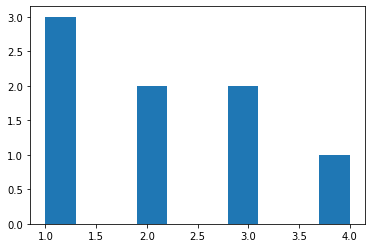

In [87]:
data = [1,2,1,3,3,1,4,2]

# following line only for ipynb, so that the plots will appear here itself rather opening in a new window
%matplotlib inline 

import matplotlib.pyplot as plt
plt.hist(data)

(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

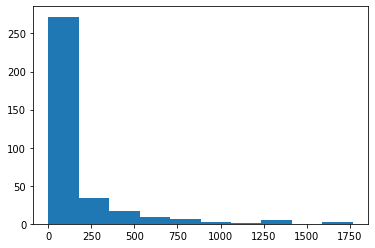

In [89]:
plt.hist(list(non_passing_minutes.values()))

(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

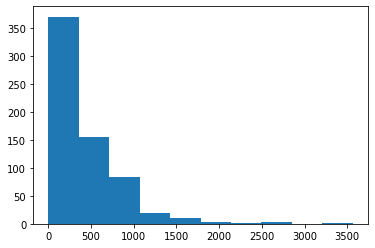

In [90]:
plt.hist(list(passing_minutes.values()))

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

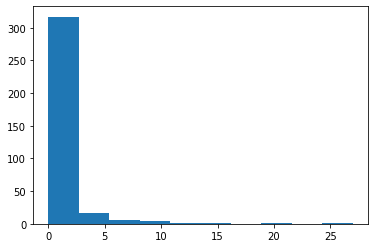

In [91]:
plt.hist(list(non_passing_lessons.values()))

(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

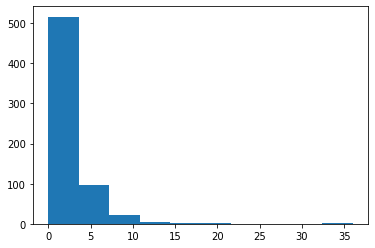

In [92]:
plt.hist(list(passing_lessons.values()))

(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

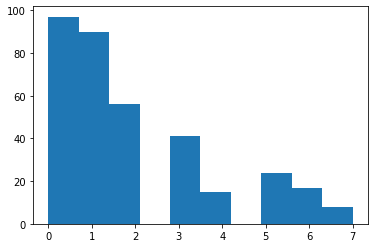

In [93]:
plt.hist(list(non_passing_visits.values()))

(array([87., 82., 79.,  0., 91., 77.,  0., 85., 78., 68.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

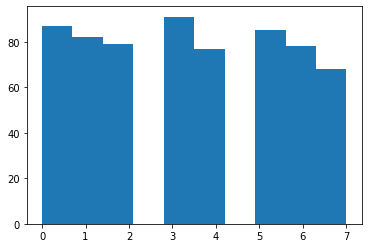

In [94]:
plt.hist(list(passing_visits.values()))

In [95]:
# Tentative Conclusion:
# Students who pass the subway project spend more minutes in the classroom during their first week

In [96]:
# At this point, we can make machine learning predictions
# Like, which students are most likely to pass their first project?
# Machine learning can make predictions automatically depending on the algorithm we use.

In [97]:
pip install seaborn

Text(0.5, 1.0, 'Distribution of total minutes spent in classroom for the first week for students who passed the subway project')

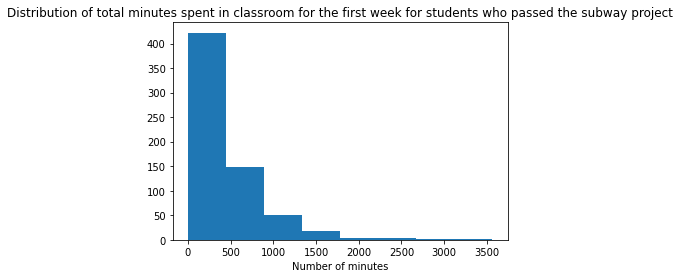

In [101]:
plt.hist(list(passing_minutes.values()),bins = 8)
plt.xlabel('Number of minutes')
plt.title('Distribution of total minutes spent in classroom for the first week' + 
          ' for students who passed the subway project')

Text(0.5, 1.0, 'Distribution of total minutes spent in classroom for the first week for students who do not passed the subway project')

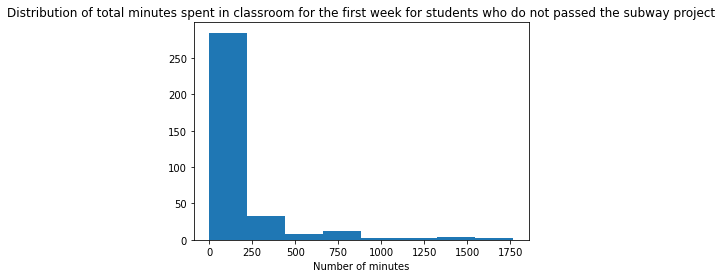

In [102]:
plt.hist(list(non_passing_minutes.values()),bins = 8)
plt.xlabel('Number of minutes')
plt.title('Distribution of total minutes spent in classroom for the first week' + 
          ' for students who do not passed the subway project')
